# Prueba de evaluación 2
# Parte 1

In [1]:
import requests as rq
import pandas as pd
import numpy as np
import json
import random
import time 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import normaltest 

Consulta catalogo de Boards de la página 4chan, se evalua el tipo de contenido y la respuesta

In [2]:
r = rq.get('https://a.4cdn.org/boards.json')
boards = json.loads(r.text)
boards

{u'boards': [{u'board': u'3',
   u'bump_limit': 310,
   u'cooldowns': {u'images': 60, u'replies': 60, u'threads': 600},
   u'image_limit': 150,
   u'is_archived': 1,
   u'max_comment_chars': 2000,
   u'max_filesize': 4194304,
   u'max_webm_duration': 120,
   u'max_webm_filesize': 3145728,
   u'meta_description': u"&quot;/3/ - 3DCG&quot; is 4chan's board for 3D modeling and imagery.",
   u'pages': 10,
   u'per_page': 15,
   u'title': u'3DCG',
   u'ws_board': 1},
  {u'board': u'a',
   u'bump_limit': 500,
   u'cooldowns': {u'images': 60, u'replies': 60, u'threads': 600},
   u'custom_spoilers': 1,
   u'image_limit': 250,
   u'is_archived': 1,
   u'json_tail_size': 50,
   u'max_comment_chars': 2000,
   u'max_filesize': 4194304,
   u'max_webm_duration': 120,
   u'max_webm_filesize': 3145728,
   u'meta_description': u"&quot;/a/ - Anime &amp; Manga&quot; is 4chan's imageboard dedicated to the discussion of Japanese animation and manga.",
   u'pages': 10,
   u'per_page': 15,
   u'spoilers': 1,


Seleccion de BOARDS de forma random

In [3]:
list = range(len(boards["boards"]))
sel = random.sample(list, 2)

Se seleccionan los tableros y se separan en 2 distintos, para trabajarlos 

In [4]:
boarduno = boards["boards"][sel[0]]
boarddos = boards["boards"][sel[1]]
datpl = boarduno["board"]

Se recorre los post y se construye resultado

In [5]:
def recorre_board(df, board):
    paginas = board["pages"] 
    count = 0
    # COlocamos un time sleep, segun recomendacion de la pagina
    time.sleep(2)
    for cont_paginas in range(paginas):
        url_rec = 'https://a.4cdn.org/' + board["board"] + '/'+ str(cont_paginas+1) + '.json'
        print "Analizando Pagina :" + url_rec
        tb1 = rq.get(url_rec, allow_redirects=False)
        respag = json.loads(tb1.text)
        for cont_thread in respag["threads"]:
            for cont_post in cont_thread["posts"]:
                number = int(cont_post["no"])
                name = cont_post["name"]
                boardO = board["board"]
                replies = 0
                fsize = 0
                com = ""
                if ("name" in cont_post):
                    name = cont_post["name"]               
                if ("com" in cont_post):
                    com = cont_post["com"]
                if ("replies" in cont_post):
                    replies = int(cont_post["replies"])
                if ("fsize" in cont_post):
                    fsize = int(cont_post["fsize"])
                df.loc[number] = [boardO, name, com, fsize, replies]

Primero se crea el df destinos (para comparacion)

In [6]:
detailframe = pd.DataFrame(columns=["tablero", "name", "com", "fsize", "replies"])

Recorre primero board

In [7]:
recorre_board(detailframe, boarduno)

Analizando Pagina :https://a.4cdn.org/pol/1.json
Analizando Pagina :https://a.4cdn.org/pol/2.json
Analizando Pagina :https://a.4cdn.org/pol/3.json
Analizando Pagina :https://a.4cdn.org/pol/4.json
Analizando Pagina :https://a.4cdn.org/pol/5.json
Analizando Pagina :https://a.4cdn.org/pol/6.json
Analizando Pagina :https://a.4cdn.org/pol/7.json
Analizando Pagina :https://a.4cdn.org/pol/8.json
Analizando Pagina :https://a.4cdn.org/pol/9.json
Analizando Pagina :https://a.4cdn.org/pol/10.json


Recorre segundo board

In [8]:
recorre_board(detailframe, boarddos)

Analizando Pagina :https://a.4cdn.org/ic/1.json
Analizando Pagina :https://a.4cdn.org/ic/2.json
Analizando Pagina :https://a.4cdn.org/ic/3.json
Analizando Pagina :https://a.4cdn.org/ic/4.json
Analizando Pagina :https://a.4cdn.org/ic/5.json
Analizando Pagina :https://a.4cdn.org/ic/6.json
Analizando Pagina :https://a.4cdn.org/ic/7.json
Analizando Pagina :https://a.4cdn.org/ic/8.json
Analizando Pagina :https://a.4cdn.org/ic/9.json
Analizando Pagina :https://a.4cdn.org/ic/10.json


Ver DF Creado

In [9]:
detailframe.size

8615

In [10]:
detailframe.head(10)

,tablero,name,com,fsize,replies
40489590,pol,Anonymous,"This board is for the discussion of news, worl...",585063.0,0.0
92615285,pol,Anonymous,"Honest question to ex-Yugoslavs here, do you f...",508657.0,91.0
92626047,pol,Anonymous,"<a href=""#p92615285"" class=""quotelink"">&gt;&gt...",0.0,0.0
92626062,pol,Anonymous,"<a href=""#p92615285"" class=""quotelink"">&gt;&gt...",0.0,0.0
92626124,pol,Anonymous,"<a href=""#p92624206"" class=""quotelink"">&gt;&gt...",0.0,0.0
92626144,pol,Anonymous,"<a href=""#p92625930"" class=""quotelink"">&gt;&gt...",53584.0,0.0
92626209,pol,Anonymous,"<a href=""#p92626047"" class=""quotelink"">&gt;&gt...",0.0,0.0
92598615,pol,Anonymous,http://www.dailymail.co.uk/news/art<wbr>icle-3...,138222.0,182.0
92624432,pol,Anonymous,"As always, I will be only concerned if Russian...",0.0,0.0
92625031,pol,Anonymous,"<a href=""#p92610076"" class=""quotelink"">&gt;&gt...",0.0,0.0


Se observan valor en 0 (Fsize y replies), se proceden a eliminar de lo contrario afectara la media a comparar

In [11]:
detailtmp = detailframe
detailframe = detailframe[detailframe.fsize != 0]
detailframe = detailframe[detailframe.replies != 0]

In [12]:
detailframe.head(10)

,tablero,name,com,fsize,replies
92615285,pol,Anonymous,"Honest question to ex-Yugoslavs here, do you f...",508657.0,91.0
92598615,pol,Anonymous,http://www.dailymail.co.uk/news/art<wbr>icle-3...,138222.0,182.0
92618431,pol,Anonymous,"Polish website reports:<br><br><span class=""qu...",18041.0,20.0
92625625,pol,Anonymous,REGISTER AND VOTE EARLY<br>https://vote.usa.go...,80672.0,46.0
92608879,pol,Anonymous,Everything you need to know<br>https://syriage...,78857.0,195.0
92612945,pol,Anonymous,Let&#039;s say the UK and France declare war o...,84035.0,111.0
92612923,pol,Anonymous,https://arxiv.org/pdf/1610.03452v1.<wbr>pdf<br...,64757.0,47.0
92611808,pol,Anonymous,Is marijuana degenerate? it can be a really he...,52283.0,70.0
92619947,pol,Anonymous,What&#039;s this I hear about finns not having...,4626.0,57.0
92620359,pol,Anonymous,THIS IS NOT A DRILL<br><br>THESE HAPPENINGS WO...,93790.0,212.0


Se determina la media de los tableros

In [13]:
bygroup_treatment = detailframe.groupby('tablero')
bygroup_treatment['replies'].agg([np.mean,])

,mean
tablero,
ic,53.852113
pol,60.171598


Confirmacion de la media de los Tablers con otra funcion

In [14]:
detailframe['replies'].groupby([detailframe['tablero']]).mean()

tablero
ic     53.852113
pol    60.171598
Name: replies, dtype: float64

Distribucion de las imagenes

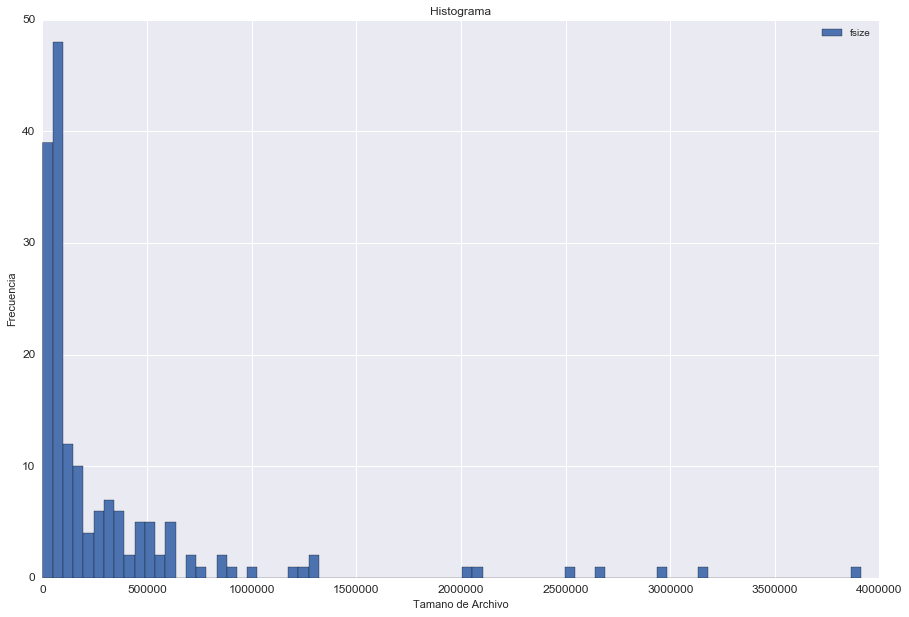

In [15]:
%matplotlib inline
plframe = detailframe[detailframe.tablero == datpl]

ax = plframe[['fsize']].plot(kind="hist", title ="Histograma",figsize=(15,10),legend=True, fontsize=12, bins=80)
plt.ylabel('Frecuencia')
plt.xlabel('Tamano de Archivo')
plt.show()



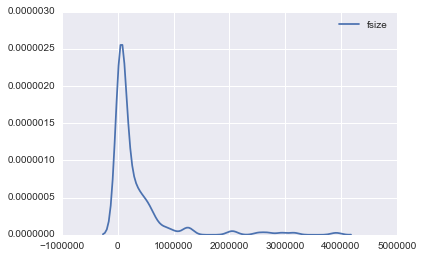

In [16]:
sns.kdeplot(plframe['fsize'])

In [17]:
z,pval1 = normaltest(plframe['fsize'])
if(pval1 < 0.055):
    print "Not normal distribution ----> ", pval1
else:
    print pval1

Not normal distribution ---->  4.60651580424e-35
